In [26]:
%matplotlib inline
import nilearn.plotting as niplt
import nibabel as nib
from pathlib import Path

In [27]:
root = Path('D:/neuroscout/datasets/')

In [148]:
paths =['SherlockMerlin/derivatives/neuroscout/vk0/fitlins/',
        'HealthyMindNetwork/derivatives/neuroscout/04E/fitlins',
        'life/derivatives/neuroscout/VV1/fitlins']
paths = [root / p for p in paths]

In [161]:
contrasts = ['rmse', 'shotChange', 'indoors']

SherlockMerlin_rmse


C:\Program Files\Anaconda3\lib\site-packages\matplotlib\artist.py:879: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  return func(v)


HealthyMindNetwork_rmse
life_rmse
SherlockMerlin_shotChange
HealthyMindNetwork_shotChange
life_shotChange
SherlockMerlin_indoors
HealthyMindNetwork_indoors
life_indoors


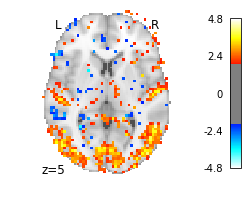

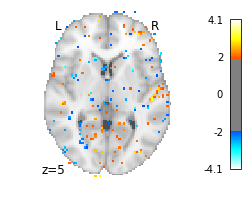

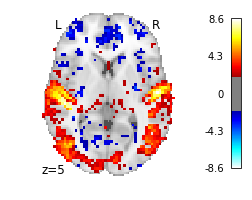

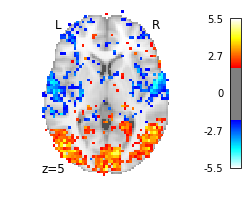

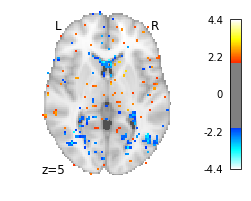

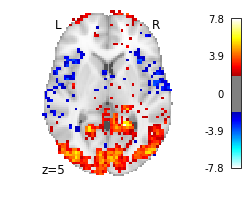

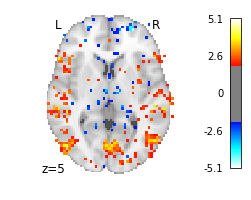

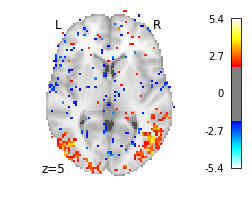

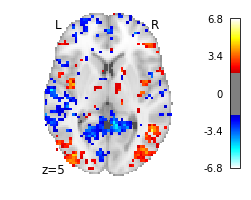

In [165]:
for c in contrasts:
    for p in paths:
        img = list(p.glob('*{}*stat*'.format(c)))
        dset = p.parts[3]
        if img:
            t = 1.96
            print(dset + '_' + c)
            pl = niplt.plot_stat_map(img[0].as_posix(), threshold=t, display_mode='z',
                                    cut_coords=[5])


## Demographics

In [190]:
import pandas as pd
demo = [pd.read_csv(a) for a in Path('c:/Users/aid338/Downloads/').glob('HBN_R1*no.csv')]

In [191]:
list(Path('c:/Users/aid338/Downloads/').glob('HBN_*no.csv'))

[WindowsPath('c:/Users/aid338/Downloads/HBN_R1_1_Pheno.csv'),
 WindowsPath('c:/Users/aid338/Downloads/HBN_R2_1_Pheno.csv'),
 WindowsPath('c:/Users/aid338/Downloads/HBN_R3_Pheno.csv')]

In [192]:
demo = pd.concat(demo)

In [193]:
sub_list = Path('d:/neuroscout/datasets/HealthyMindNetwork/derivatives/neuroscout/DEb/events/speech/').glob('sub-*')

In [194]:
sub_list = [a.name.strip('sub-')[:12] for a in sub_list]

In [195]:
demo = demo[demo.EID.isin(sub_list)]

In [198]:
demo

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
129,NDARYR829KD8,1,13.693132,-86.71,Yes,Yes
130,NDARZW930MF2,0,10.156399,83.38,Yes,No
202,NDARZL724HAX,0,7.881131,100.05,No,Yes
205,NDARZJ460RWZ,0,9.086014,93.38,No,Yes
224,NDARYA556KP8,1,20.803559,83.38,No,Yes
246,NDARZD415ZZ1,0,7.697923,93.38,Yes,Yes
264,NDARYY218LU2,0,6.259981,-56.70,Yes,Yes
283,NDARZP630WYL,0,18.654688,100.05,Yes,Yes
325,NDARYL758JGG,0,14.580310,87.84,Yes,Yes
454,NDARZA694WHF,0,12.899269,93.38,No,Yes


In [184]:
demouniq = demo.groupby('EID').mean()

In [185]:
demouniq.dtypes

Sex            int64
Age          float64
EHQ_Total    float64
dtype: object

In [186]:
demouniq.groupby('Sex').count()

,Age,EHQ_Total
Sex,,
0,16,16
1,13,13


In [187]:
len(sub_list)

29

In [188]:
demouniq.mean()

Sex           0.448276
Age          11.565787
EHQ_Total    52.672759
dtype: float64

In [189]:
demouniq.std()

Sex           0.506120
Age           4.009892
EHQ_Total    61.159995
dtype: float64

### Merlin

In [124]:
merlin_demo = pd.read_csv('d:/neuroscout/datasets/SherlockMerlin/participants.tsv', delimiter='\t')

In [138]:
merlin_sub_list = Path('d:/neuroscout/datasets/SherlockMerlin//derivatives/neuroscout/Jva/events/speech/').glob('sub-*')

In [139]:
merlin_sub_list = [a.name[:6] for a in merlin_sub_list]

In [142]:
merlin_demo = merlin_demo[merlin_demo.participant_id.isin(merlin_sub_list)]

In [143]:
merlin_demo

,participant_id,sex,age,mem_score
18,sub-19,F,20,9.803030303
19,sub-20,F,20,14.06060606
20,sub-21,M,22,18.04545455
21,sub-22,M,25,11.56818182
22,sub-23,F,21,18.0530303
23,sub-24,M,19,14.40909091
25,sub-26,M,19,11.79545455
26,sub-27,F,21,7.25
27,sub-28,F,19,9.583333333
28,sub-29,F,22,21.43939394


In [145]:
merlin_demo.groupby('sex').count()

,participant_id,age,mem_score
sex,,,
F,11,11,11
M,6,6,6


In [146]:
merlin_demo.mean()

age    20.882353
dtype: float64

In [147]:
merlin_demo.std()

age    2.027386
dtype: float64